# Task 1: Build a House Price Prediction Model


### Problem Statement
Develop a machine learning model to predict the prices of houses based on features such as location, size, number of rooms, etc.
Points: 50
Requirements:
1. Dataset Acquisition:
Obtain a dataset containing information about houses including features and
corresponding prices.
2. Data Preprocessing: (Optional - Brownie Points)
Clean and preprocess the dataset to handle missing values, categorical variables,
and feature scaling.
3. Model Training:
Train a regression model (e.g., linear regression, decision trees, or ensemble
methods) to predict house prices.
4. Evaluation:
Evaluate the model's performance using metrics such as mean squared error (MSE)
or mean absolute error (MAE).


### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import accuracy score
from sklearn.metrics import accuracy_score, mean_absolute_error

from sklearn import metrics

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing the Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

C:\Users\AtharvaShah\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

In [3]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [7]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [9]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [10]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [11]:
correlation = house_price_dataframe.corr()

<AxesSubplot: >

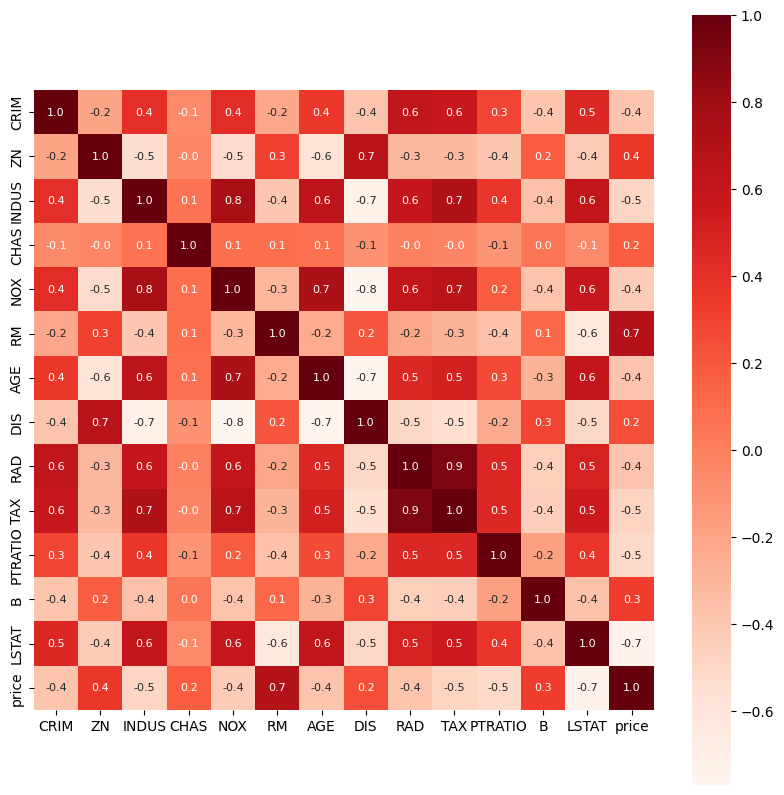

In [12]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

## Splitting the data and Target

In [13]:
# only keep features with correlation with abs value >= 0.4
X = house_price_dataframe[['LSTAT', 'RM', 'CRIM', 'INDUS']]
Y = house_price_dataframe['price']

In [14]:
print(X)
print(Y)

     LSTAT     RM     CRIM  INDUS
0     4.98  6.575  0.00632   2.31
1     9.14  6.421  0.02731   7.07
2     4.03  7.185  0.02729   7.07
3     2.94  6.998  0.03237   2.18
4     5.33  7.147  0.06905   2.18
..     ...    ...      ...    ...
501   9.67  6.593  0.06263  11.93
502   9.08  6.120  0.04527  11.93
503   5.64  6.976  0.06076  11.93
504   6.48  6.794  0.10959  11.93
505   7.88  6.030  0.04741  11.93

[506 rows x 4 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


## Splitting the data into Training data and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(506, 4) (404, 4) (102, 4)


Model Training

XGBoost Regressor

In [17]:
# loading the model
model = LinearRegression()

In [18]:
# training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()

## Evaluation - Prediction on training data

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[26.80890867 23.11498787 22.66767427 32.54426594 17.13896202 17.52761825
 19.33567724 15.00989568 17.28251884 22.01984112 14.29707521 10.23898222
 29.19202234 23.20760202 31.34391795 19.93087423 24.06554465 22.93697385
 32.11761845 22.8490061  26.53421108  6.84273658 35.54213202 22.71350033
 18.50600656 22.09730024 22.57248582 29.10132866 21.93690059 32.93187777
 24.00902189 12.25622424 19.27163869  8.46683108 19.08580109 12.46438605
 17.10731549 23.07003144 13.36666164 19.23529256 27.0136277  29.26492899
 19.81131781 20.21672763 17.045594   14.06806072 28.79001123 18.7480933
 36.90251548 20.18177442 23.63003342 31.53032821 20.17425032 28.0908871
 19.53228392 23.418192   20.27267205 31.05345407 30.13550231 31.06225844
 25.15907566 36.09214085  9.47437398  6.60036795 26.7431378  18.14351996
 26.287866   17.10111691 23.76785391 35.9715728  33.46763035 32.40293312
 24.47022068 32.39809355 26.42394189 38.38091112 18.66005001 19.38205445
 23.98756031 25.99035968 29.33289518 26.24071551 26.6

In [21]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# RMSE (Root Mean Squared Error)
score_2 = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))

score_mean_absolute_error = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Root Mean Absolute Error : ', score_2)
print('Mean Absolute Error : ', score_mean_absolute_error)

R squared error :  0.6263236509934598
Root Mean Absolute Error :  5.621545298242745
Mean Absolute Error :  3.96993787189056


## Visualizing the actual Prices and predicted prices

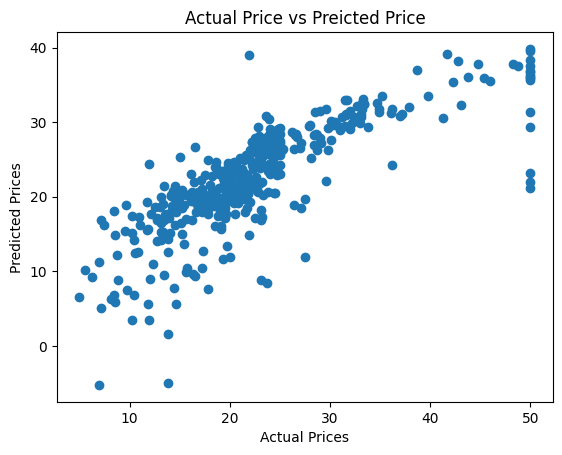

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data 

In [23]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [28]:
# R squared error
print("R squared error : ", metrics.r2_score(Y_test, test_data_prediction))

# Mean Squared Error
print('MSE : ', metrics.mean_squared_error(Y_test, test_data_prediction))

# Root Mean Square Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction)))

# Mean Absolute Error
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, test_data_prediction))

# Model Evaluation
# print('R^2:',metrics.r2_score(y_test, test_data_prediction))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
# print('MSE:',metrics.mean_squared_error(y_train, y_pred))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R squared error :  0.7236867450792813
MSE :  23.116278998471078
RMSE:  4.807939163349624
Mean Absolute Error :  3.539244868989186
